# 🏗️ Geometric Manipulations with GeoPandas  

This notebook demonstrates **constructive methods** and **affine transformations** available in `GeoSeries` (GeoPandas).  

We will:  
- Create sample geometries (`Point`, `LineString`, `Polygon`)  
- Apply **constructive methods** (buffer, boundary, hulls, triangulation, etc.)  
- Apply **affine transformations** (rotate, scale, skew, translate)  
- Visualize each result with attractive plots  

---


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

# Base geometries: Polygon, Line, Points
poly = Polygon([(0,0),(2,0),(2,2),(0,2)])
line = LineString([(0,0),(2,2),(4,0)])
points = [Point(0,0), Point(2,2), Point(1,1)]

g = gpd.GeoSeries([poly, line, *points])

def plot_geoseries(gs, title, color="lightblue", edgecolor="black"):
    fig, ax = plt.subplots(figsize=(5,5))
    gs.plot(ax=ax, color=color, edgecolor=edgecolor, alpha=0.7)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.axis("equal")
    plt.show()


# 🔹 Constructive Methods  

Constructive methods create **new geometries** derived from existing ones.  
Below we show examples with plots.  


### Buffer
**Description:** Expands geometries outward by 0.5 units.

```python
g.buffer(0.5)
```

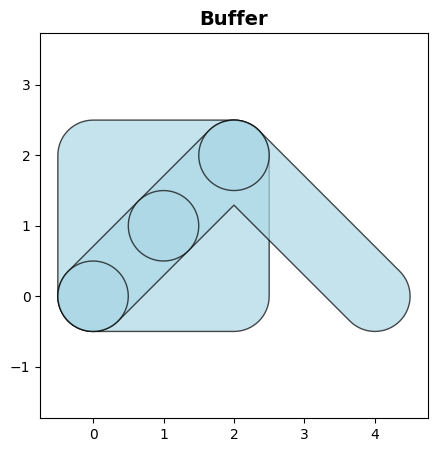

In [14]:
plot_geoseries(g.buffer(0.5), 'Buffer')

### Boundary
**Description:** Returns only the boundary (outline) of each geometry.

```python
g.boundary
```

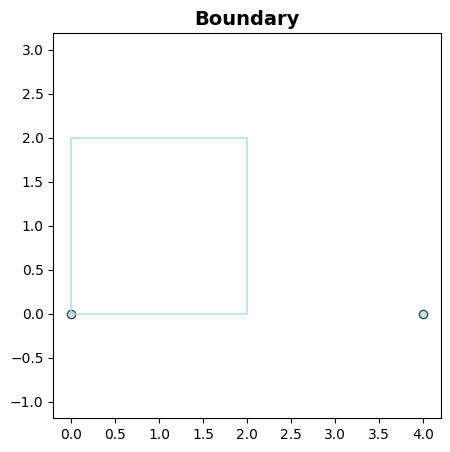

In [15]:
plot_geoseries(g.boundary, 'Boundary')

### Centroid
**Description:** Finds the centroid (geometric center).

```python
g.centroid
```

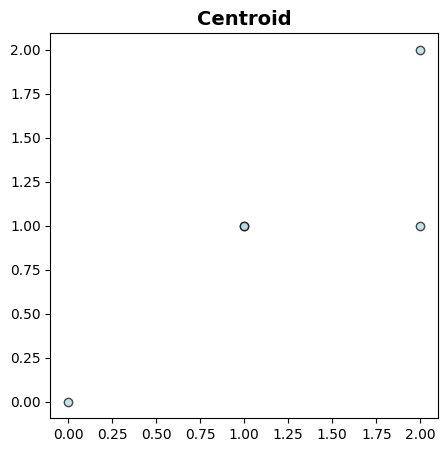

In [16]:
plot_geoseries(g.centroid, 'Centroid')

### Concave Hull
**Description:** Smallest concave polygon enclosing geometry.

```python
g.concave_hull
```

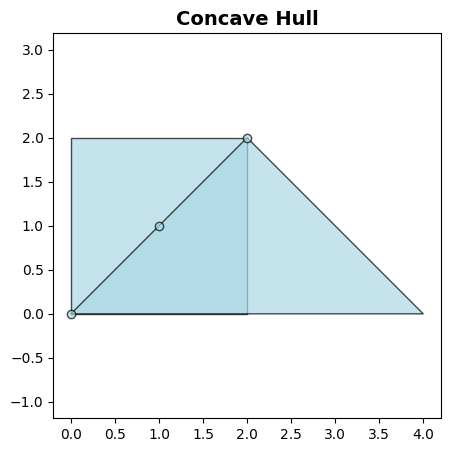

In [17]:
concav=g.concave_hull()
plot_geoseries(concav, 'Concave Hull')


### Convex Hull
**Description:** Smallest convex polygon enclosing geometry.

```python
g.convex_hull
```

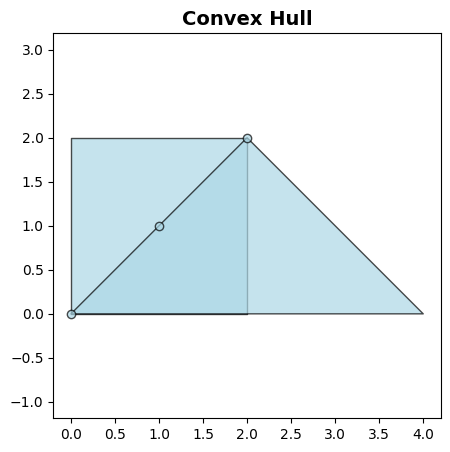

In [18]:
plot_geoseries(g.convex_hull, 'Convex Hull')

### Constrained Delaunay Triangles
**Description:** Triangulates polygon with edges constrained to boundary.

```python
gpd.GeoSeries([poly]).constrained_delaunay_triangles()
```

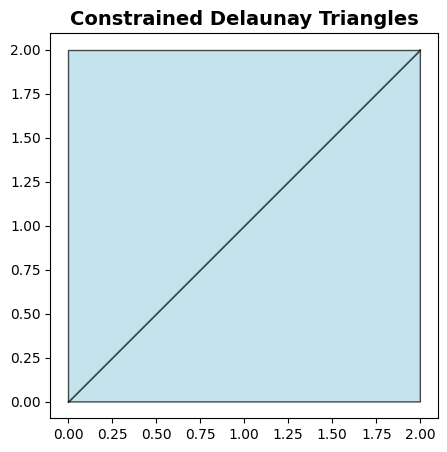

In [19]:
plot_geoseries(gpd.GeoSeries([poly]).constrained_delaunay_triangles(), 'Constrained Delaunay Triangles')

### Delaunay Triangles
**Description:** Triangulates polygon vertices into triangles.

```python
gpd.GeoSeries([poly]).delaunay_triangles(tolerance=0.01)
```

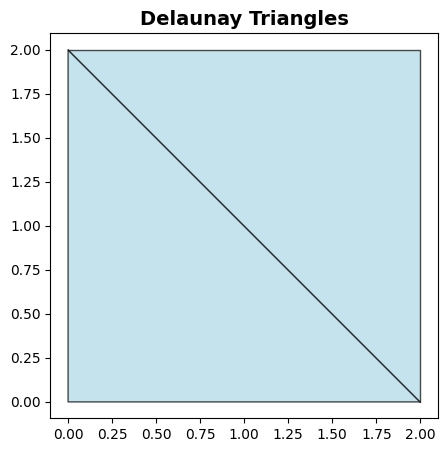

In [20]:
plot_geoseries(gpd.GeoSeries([poly]).delaunay_triangles(tolerance=0.01), 'Delaunay Triangles')

### Envelope
**Description:** Axis-aligned bounding box.

```python
g.envelope
```

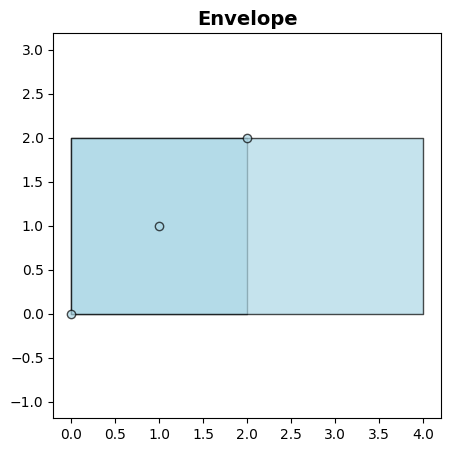

In [21]:
plot_geoseries(g.envelope, 'Envelope')

### Extract Unique Points
**Description:** All distinct vertices as multipoint.

```python
g.extract_unique_points()
```

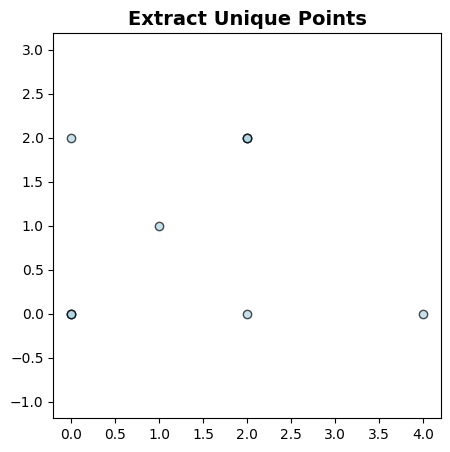

In [22]:
plot_geoseries(g.extract_unique_points(), 'Extract Unique Points')

### Offset Curve
**Description:** Offset line by 0.3 units.

```python
gpd.GeoSeries([line]).offset_curve(0.3)
```

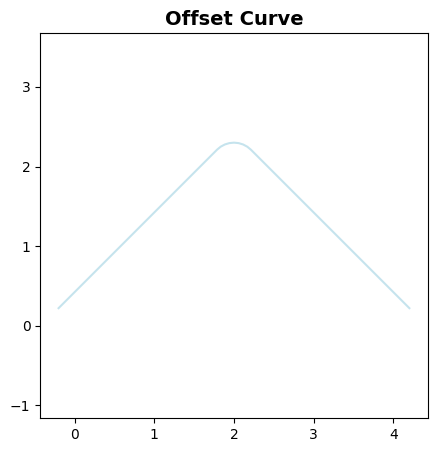

In [23]:
plot_geoseries(gpd.GeoSeries([line]).offset_curve(0.3), 'Offset Curve')

### Remove Repeated Points
**Description:** Removes duplicate vertices.

```python
gpd.GeoSeries([LineString([(0,0),(1,1),(1,1),(2,2)])]).remove_repeated_points()
```

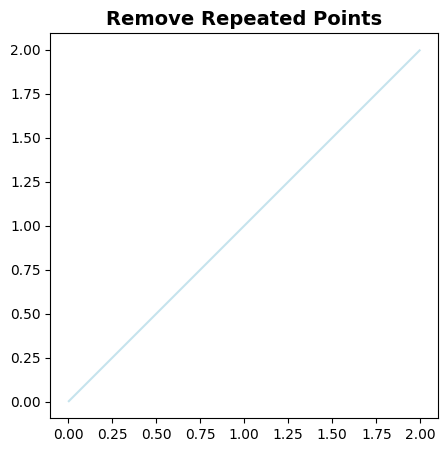

In [24]:
plot_geoseries(gpd.GeoSeries([LineString([(0,0),(1,1),(1,1),(2,2)])]).remove_repeated_points(), 'Remove Repeated Points')

### Simplify
**Description:** Simplifies geometries with tolerance=0.5.

```python
g.simplify(0.5)
```

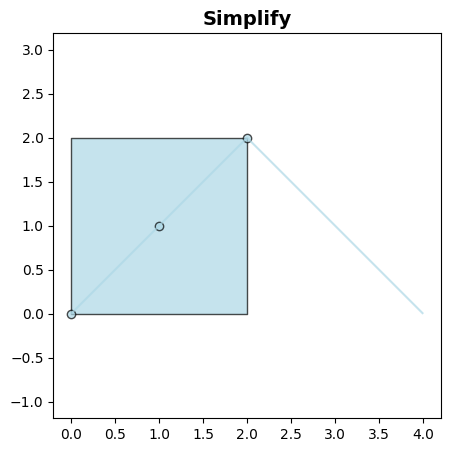

In [25]:
plot_geoseries(g.simplify(0.5), 'Simplify')

### Segmentize
**Description:** Adds points so max segment length = 2.

```python
gpd.GeoSeries([LineString([(0,0),(10,0)])]).segmentize(2)
```

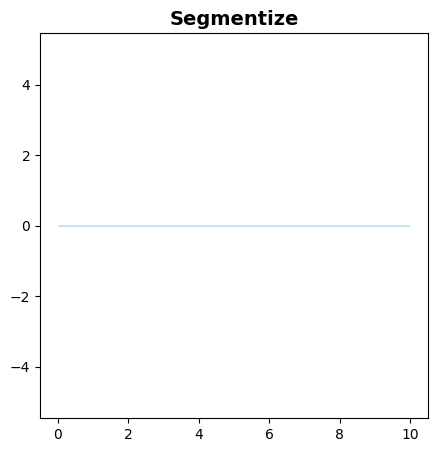

In [26]:
plot_geoseries(gpd.GeoSeries([LineString([(0,0),(10,0)])]).segmentize(2), 'Segmentize')

### Union All
**Description:** Union of all geometries in GeoSeries.

```python
gpd.GeoSeries([g.union_all()])
```

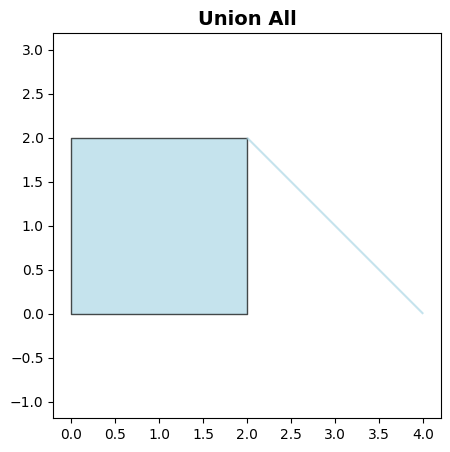

In [27]:
plot_geoseries(gpd.GeoSeries([g.union_all()]), 'Union All')

# 🔹 Affine Transformations  

Affine transformations change **position, scale, rotation, or shape** of geometries.  


### Affine Transform
**Description:** Applies matrix, translates geometries by (2,3).

```python
g.affine_transform([1,0,0,1,2,3])
```

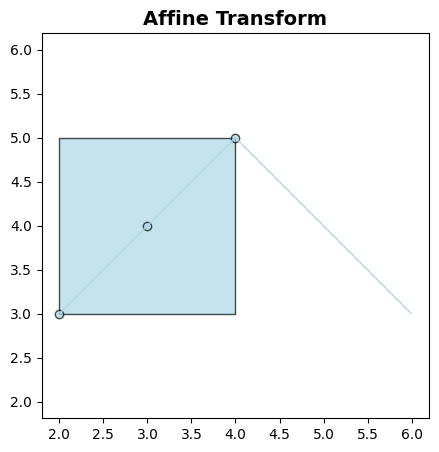

In [28]:
plot_geoseries(g.affine_transform([1,0,0,1,2,3]), 'Affine Transform')

### Rotate
**Description:** Rotates geometries 45° around center.

```python
g.rotate(45)
```

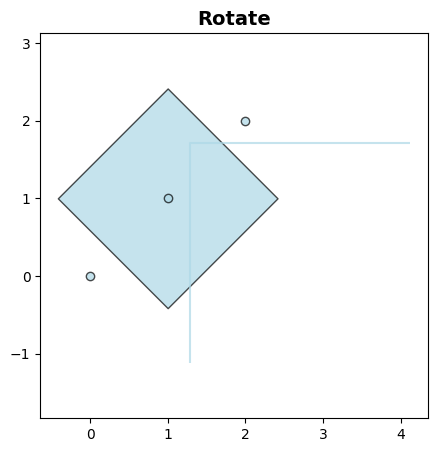

In [29]:
plot_geoseries(g.rotate(45), 'Rotate')

### Scale
**Description:** Scales geometries: x2 horizontally, 0.5 vertically.

```python
g.scale(xfact=2, yfact=0.5)
```

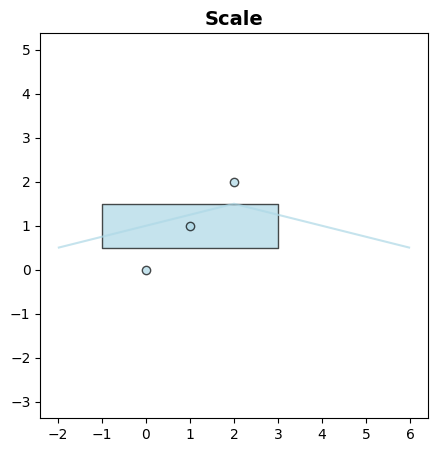

In [30]:
plot_geoseries(g.scale(xfact=2, yfact=0.5), 'Scale')

### Skew
**Description:** Shears geometries: 30° along X, 10° along Y.

```python
g.skew(30, 10)
```

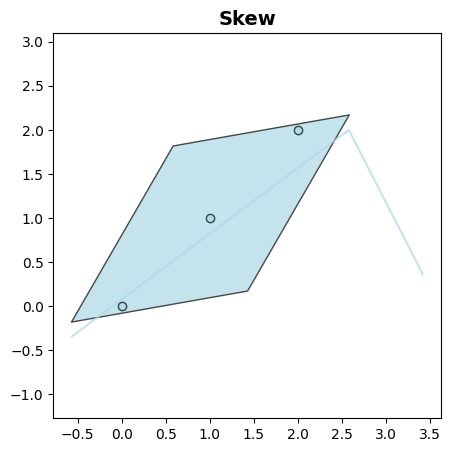

In [31]:
plot_geoseries(g.skew(30, 10), 'Skew')

### Translate
**Description:** Shifts geometries by +2 in X and +3 in Y.

```python
g.translate(xoff=2, yoff=3)
```

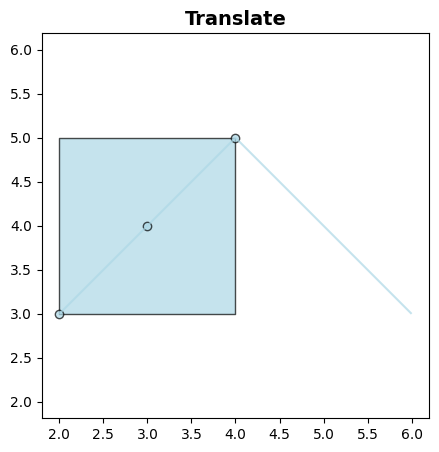

In [32]:
plot_geoseries(g.translate(xoff=2, yoff=3), 'Translate')